# Filter bank and MFCC
[refering this link](http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html)

In [152]:
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt 
%matplotlib inline

In [153]:
sample_rate, signal = scipy.io.wavfile.read('Ses01F_script01_2_F008.wav')  # File assumed to be in the same directory
# signal = signal[0:int(3.5 * sample_rate)]  # to take only first 3.5s
print(signal.shape)

(172479,)


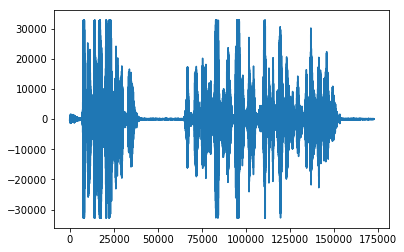

In [154]:
plt.plot(signal)
plt.show()

In [155]:
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
print(emphasized_signal.shape)

(172479,)


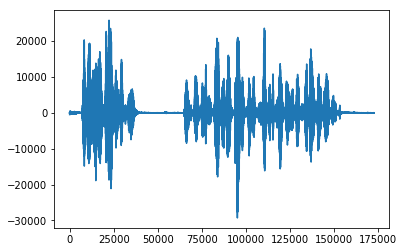

In [156]:
plt.plot(emphasized_signal)
plt.show()

In [157]:
frame_size = 0.025
frame_stride = 0.01

frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]
print(frames.shape)

(1076, 400)


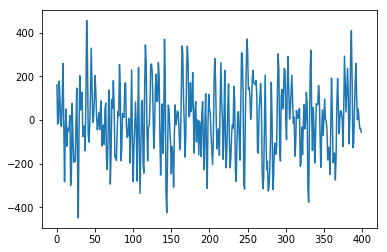

In [158]:
plt.plot(frames[1,:])
plt.show()

In [159]:
frames *= numpy.hamming(frame_length)
print(frames.shape)

(1076, 400)


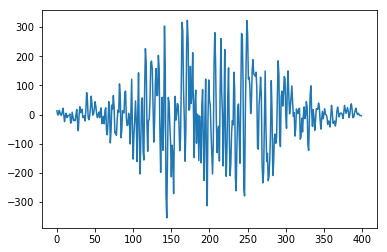

In [160]:
plt.plot(frames[1,:])
plt.show()

In [161]:
NFFT = 512
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2)) 
print(pow_frames.shape)

(1076, 257)


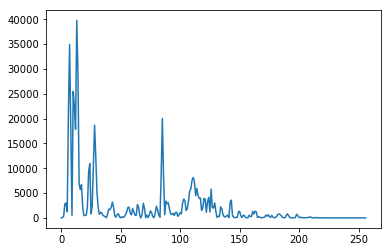

In [162]:
plt.plot(pow_frames[10,:])
plt.show()

In [163]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB
print(filter_banks.shape)

(1076, 40)


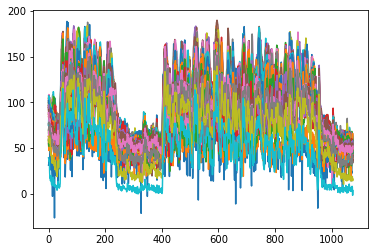

In [164]:
plt.plot(filter_banks)
plt.show()

In [165]:
num_ceps = 12
mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
print(mfcc.shape)

(1076, 12)


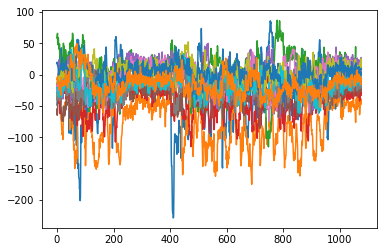

In [166]:
plt.plot(mfcc)
plt.show()

In [167]:
cep_lifter = 14
(nframes, ncoeff) = mfcc.shape
n = numpy.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
mfcc *= lift
# print(mfcc.shape)

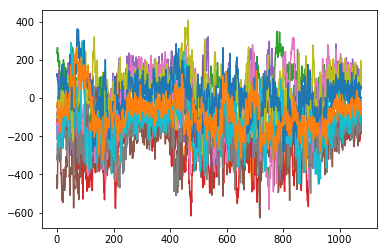

In [168]:
plt.plot(mfcc)
plt.show()

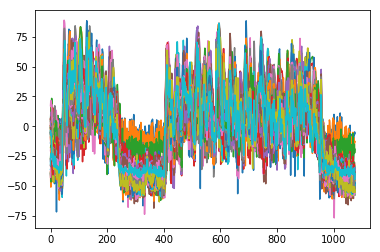

In [169]:
filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)
plt.plot(filter_banks)
plt.show()

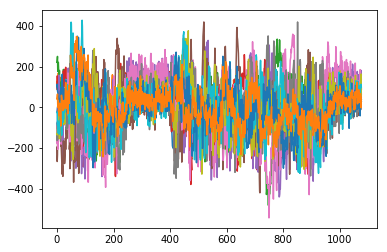

In [170]:
mfcc -= (numpy.mean(mfcc, axis=0) + 1e-8)
plt.plot(mfcc)
plt.show()

# from python_speech_features

In [171]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav

(rate,sig) = wav.read('Ses01F_script01_2_F008.wav')
mfcc_feat = mfcc(sig, rate, numcep = 12)
print(mfcc_feat.shape)

(1077, 12)


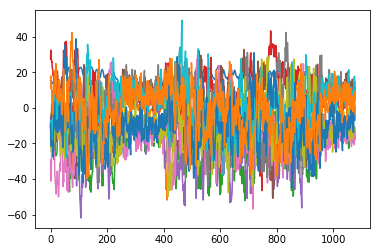

In [172]:
plt.plot(mfcc_feat)
plt.show()

In [2]:
import gzip, pickle
with gzip.open('microsoft_32_features.pkl', 'rb') as ifp:
    file = pickle.load(ifp)

In [7]:
print(file['Features'][10].shape)

(239, 32)


In [ ]:
print(df.head(10))